In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime

import shapely.geometry as sgeom
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def getISSloc():
    
    response = urlopen("http://api.open-notify.org/iss-now.json")
    obj = json.loads(response.read())
    
    lon = float(obj['iss_position']['longitude'])
    lat = float(obj['iss_position']['latitude'])
    
    return lon,lat

In [3]:
track = pd.read_csv('ISS_tracking.csv',index_col='Timestamp',parse_dates=True)

In [4]:
track.head()

,Unix_time,Lon,Lat
Timestamp,,,
2019-04-22 10:37:11,1555954631,-177.7578,23.5384
2019-04-22 10:38:12,1555954692,-175.0682,26.3770
2019-04-22 10:39:11,1555954751,-172.2561,29.1297
2019-04-22 10:40:11,1555954811,-169.2512,31.8315
2019-04-22 10:41:11,1555954871,-166.0528,34.4454


In [5]:
track.index

DatetimeIndex(['2019-04-22 10:37:11', '2019-04-22 10:38:12',
               '2019-04-22 10:39:11', '2019-04-22 10:40:11',
               '2019-04-22 10:41:11', '2019-04-22 10:42:12',
               '2019-04-22 10:43:12', '2019-04-22 10:44:12',
               '2019-04-22 10:45:12', '2019-04-22 10:46:12',
               ...
               '2019-05-07 23:14:48', '2019-05-07 23:15:48',
               '2019-05-07 23:16:48', '2019-05-07 23:17:48',
               '2019-05-07 23:18:48', '2019-05-07 23:19:48',
               '2019-05-07 23:20:48', '2019-05-07 23:21:48',
               '2019-05-07 23:22:48', '2019-05-07 23:23:48'],
              dtype='datetime64[ns]', name='Timestamp', length=22340, freq=None)

In [6]:
track['londiff'] = abs(track['Lon'].diff().shift(-1))

In [7]:
jump_indices = list(track[track['londiff']>330].index)

In [8]:
track_before_jump = track[:str(jump_indices[0])]

In [10]:
track_points = sgeom.LineString(zip(track_before_jump['Lon'], track_before_jump['Lat']))

-143.8641 49.938


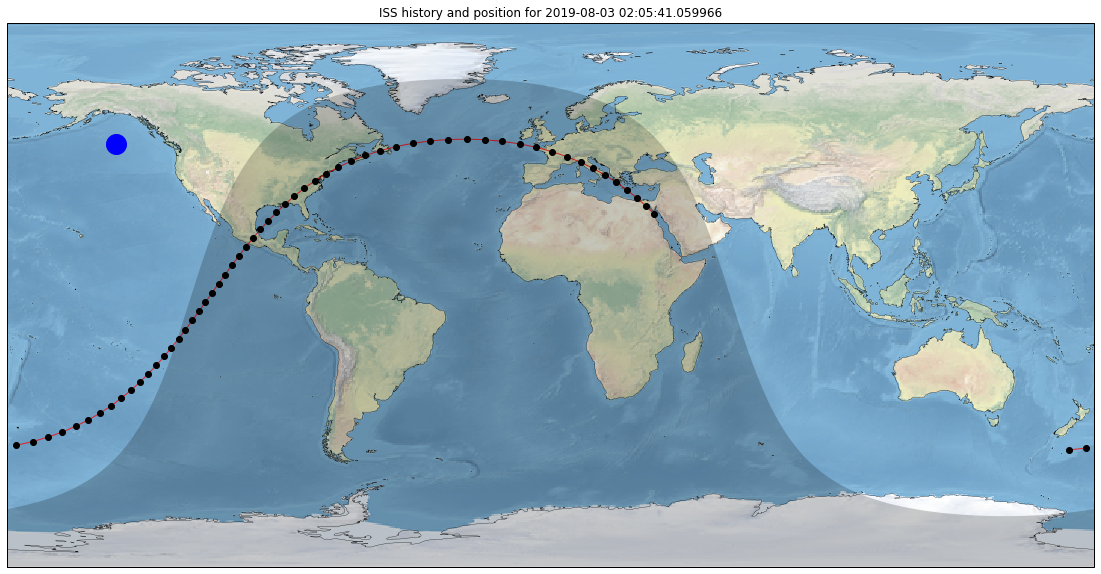

In [12]:
fig = plt.figure(figsize=(20, 10))

projection_type = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=projection_type)

ax.coastlines(resolution='50m',linewidth=0.3)

nhours_plot = 1
timestart = track.index[-1] - np.timedelta64(nhours_plot,'h')
track = track[timestart:]

jump_indices = list(track[abs(track['londiff'])>330].index)

for i in range(len(jump_indices)):
    
    if i == 0:
        subtrack = track[:jump_indices[0]]
    else:
        subtrack = track[jump_indices[i-1]:jump_indices[i]].iloc[1:]
        
    track_points = sgeom.LineString(zip(subtrack['Lon'], subtrack['Lat']))
    ax.add_geometries([track_points], projection_type,facecolor='none', \
                    edgecolor='r',alpha=0.8)
    
    #plot the locations as points
    ax.plot(subtrack['Lon'],subtrack['Lat'],'ko',transform=projection_type)

#plot the final subtrack
subtrack = track[jump_indices[i]:].iloc[1:]
track_points = sgeom.LineString(zip(subtrack['Lon'], subtrack['Lat']))
ax.add_geometries([track_points], projection_type,facecolor='none', \
                  edgecolor='r',alpha=0.8)
#plot the locations as points
ax.plot(subtrack['Lon'],subtrack['Lat'],'ko',transform=projection_type)

#Get current location
current_lon,current_lat = getISSloc()
print(current_lon,current_lat)
ax.plot(current_lon,current_lat,'bo',transform=projection_type,markersize=20)

#Get current time
date = datetime.utcnow()

ax.set_title('ISS history and position for {}'.format(date))
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.2))
plt.savefig('mymap.pdf')

In [156]:
timestart = track.index[-1]

In [159]:
timestart - np.timedelta64(1,'h')

Timestamp('2019-04-22 12:59:26')

In [56]:
track['londiff'] = abs(track['Lon'].diff().shift(-1))

In [58]:
jump_indices = list(track[track['londiff']>250].index)

In [60]:
track[jump_indices[1]:jump_indices[2]].iloc[1:]

,Unix_time,Lon,Lat,londiff
Timestamp,,,,
2019-04-22 02:21:17,1555924877,-170.5473,-51.2988,29.2650
2019-04-22 02:26:17,1555925177,-141.2823,-49.5118,23.5371
2019-04-22 02:31:17,1555925477,-117.7452,-40.8820,16.7845
2019-04-22 02:36:17,1555925777,-100.9607,-28.2904,12.7017
2019-04-22 02:41:17,1555926077,-88.2590,-13.8498,10.9957
2019-04-22 02:46:17,1555926377,-77.2633,1.2669,11.1684
2019-04-22 02:51:17,1555926677,-66.0949,16.3575,13.2258
2019-04-22 02:56:17,1555926977,-52.8691,30.6063,17.8227
2019-04-22 03:01:18,1555927278,-35.0464,42.7330,24.9495


In [93]:
jump_indices

[Timestamp('2019-04-22 00:41:14'),
 Timestamp('2019-04-22 02:16:17'),
 Timestamp('2019-04-22 03:56:19'),
 Timestamp('2019-04-22 05:31:25'),
 Timestamp('2019-04-22 07:11:27'),
 Timestamp('2019-04-22 08:51:30')]